In [37]:
import pandas as pd
import datetime as dt
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

## Читаем данные

In [26]:
df=pd.read_pickle('MG_Sales.pickle',compression='gzip')

## Формируем выборку

In [27]:
#Формируем выборку
time_series=pd.DataFrame(data=df[(df['ЦветМеталла']=='Красное золото')&(df['Дата']>=dt.date(2015,1,1))].groupby('Дата')['Количество'].sum())
time_series.index.name='ds'
time_series.columns=['y']
#time_series['y'] = np.log(time_series['y'])

## Обучение

In [35]:
def code_mean(data, cat_feature, real_feature):
    """
    Возвращает словарь, где ключами являются уникальные категории признака cat_feature, 
    а значениями - средние по real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())
    data.columns = ["y"]

    # считаем индекс в датафрейме, после которого начинается тестовыый отрезок
    test_index = int(len(data)*(1-test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)

    data.index = data.index.to_datetime()
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1

    # считаем средние только по тренировочной части, чтобы избежать лика
    #data['weekday_average'] = map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday)
    #data["hour_average"] = map(code_mean(data[:test_index], 'hour', "y").get, data.hour)

    # выкидываем закодированные средними признаки 
    data.drop(["hour", "weekday"], axis=1, inplace=True)

    data = data.dropna()
    data = data.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["y"], axis=1)
    y_train = data.loc[:test_index]["y"]
    X_test = data.loc[test_index:].drop(["y"], axis=1)
    y_test = data.loc[test_index:]["y"]

    return X_train, X_test, y_train, y_test

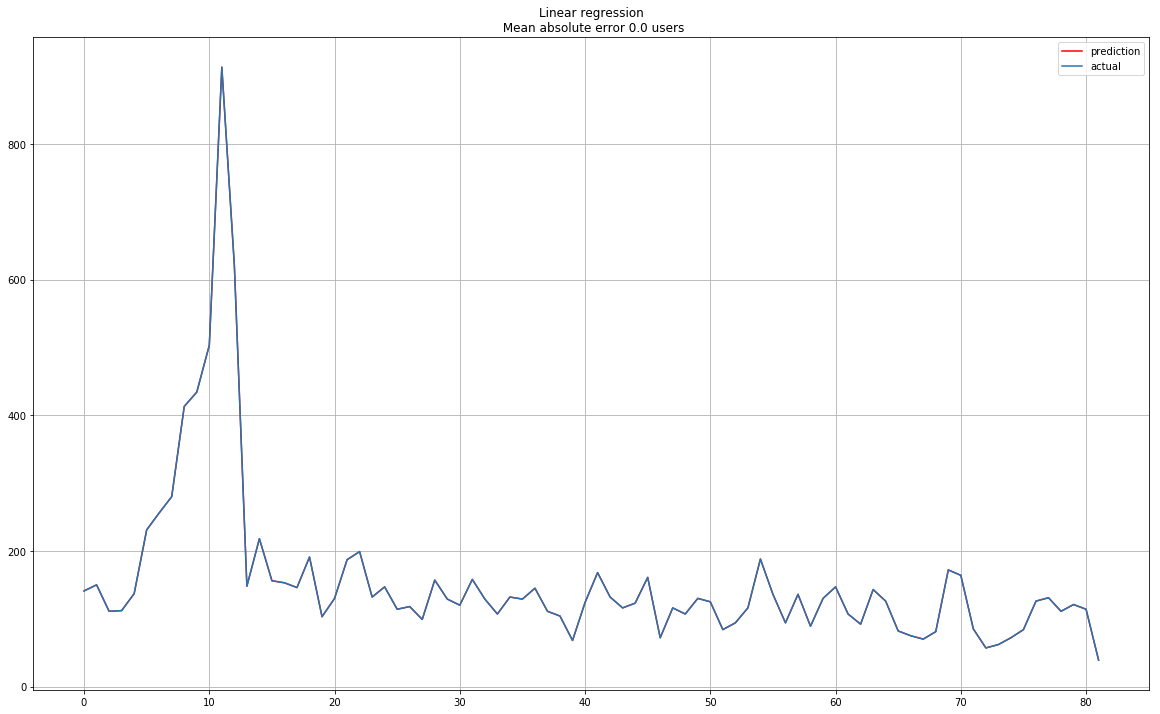

In [38]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = prepareData(time_series.y, test_size=0.3, lag_start=0, lag_end=6*30)

lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
plt.figure(figsize=(20,12))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {} users".format(round(mean_absolute_error(prediction, y_test))))
plt.grid(True);

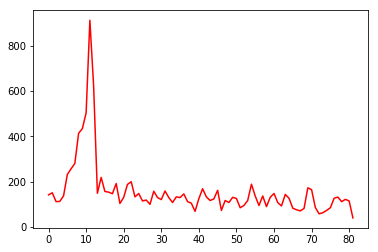

In [41]:
plt.plot(prediction, "r", label="prediction")

In [40]:
X_test

,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_171,lag_172,lag_173,lag_174,lag_175,lag_176,lag_177,lag_178,lag_179,is_weekend
606,141,154.0,163.0,165.0,120.0,154.0,178.0,168.0,181.0,146.0,...,134.0,103.0,161.0,185.0,227.0,200.0,188.0,178.0,161.0,0
607,150,141.0,154.0,163.0,165.0,120.0,154.0,178.0,168.0,181.0,...,157.0,134.0,103.0,161.0,185.0,227.0,200.0,188.0,178.0,1
608,111,150.0,141.0,154.0,163.0,165.0,120.0,154.0,178.0,168.0,...,212.0,157.0,134.0,103.0,161.0,185.0,227.0,200.0,188.0,1
609,112,111.0,150.0,141.0,154.0,163.0,165.0,120.0,154.0,178.0,...,184.0,212.0,157.0,134.0,103.0,161.0,185.0,227.0,200.0,0
610,137,112.0,111.0,150.0,141.0,154.0,163.0,165.0,120.0,154.0,...,170.0,184.0,212.0,157.0,134.0,103.0,161.0,185.0,227.0,0
611,231,137.0,112.0,111.0,150.0,141.0,154.0,163.0,165.0,120.0,...,113.0,170.0,184.0,212.0,157.0,134.0,103.0,161.0,185.0,0
612,256,231.0,137.0,112.0,111.0,150.0,141.0,154.0,163.0,165.0,...,148.0,113.0,170.0,184.0,212.0,157.0,134.0,103.0,161.0,0
613,280,256.0,231.0,137.0,112.0,111.0,150.0,141.0,154.0,163.0,...,153.0,148.0,113.0,170.0,184.0,212.0,157.0,134.0,103.0,0
614,413,280.0,256.0,231.0,137.0,112.0,111.0,150.0,141.0,154.0,...,138.0,153.0,148.0,113.0,170.0,184.0,212.0,157.0,134.0,1
615,434,413.0,280.0,256.0,231.0,137.0,112.0,111.0,150.0,141.0,...,191.0,138.0,153.0,148.0,113.0,170.0,184.0,212.0,157.0,1
